# Zadanie domowe - EDA Danych dotyczących Titanica

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`26__titanic.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad2`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [48]:
# importowanie bibliotek
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# odczytanie pliku csv
df = pd.read_csv('raw_titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [50]:
# wyswietlenie 10 losowych wierszy
df.sample(10)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1208,3.0,0.0,"Skoog, Miss. Mabel",female,9.0,3.0,2.0,347088,27.9000,NaN,S,NaN,NaN,NaN
623,3.0,0.0,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4.0,2.0,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN"
68,1.0,1.0,"Chevre, Mr. Paul Romaine",male,45.0,0.0,0.0,PC 17594,29.7000,A9,C,7,NaN,"Paris, France"
822,3.0,0.0,"Goldsmith, Mr. Nathan",male,41.0,0.0,0.0,SOTON/O.Q. 3101263,7.8500,NaN,S,NaN,NaN,"Philadelphia, PA"
965,3.0,0.0,"Lievens, Mr. Rene Aime",male,24.0,0.0,0.0,345781,9.5000,NaN,S,NaN,NaN,NaN
295,1.0,1.0,"Thayer, Mr. John Borland Jr",male,17.0,0.0,2.0,17421,110.8833,C70,C,B,NaN,"Haverford, PA"
781,3.0,0.0,"Drazenoic, Mr. Jozef",male,33.0,0.0,0.0,349241,7.8958,NaN,C,NaN,51.0,"Austria Niagara Falls, NY"
639,3.0,0.0,"Asplund, Master. Carl Edgar",male,5.0,4.0,2.0,347077,31.3875,NaN,S,NaN,NaN,"Sweden Worcester, MA"
893,3.0,0.0,"Johansson, Mr. Nils",male,29.0,0.0,0.0,347467,7.8542,NaN,S,NaN,NaN,NaN
329,2.0,1.0,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1.0,0.0,226875,26.0000,NaN,S,11,NaN,"Warwick, England"


In [51]:
# informacje o danych 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [52]:
# rozpoznanie wartości unikatowych
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [53]:
# analiza wartości średnich
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


#### informacje o danych
#####   - są 3 klasy podróży
#####   - mamy 1309 danych osób ze statku
#####   - znamy 929 sprzedanych biletów 
#####   - wiek pasarzerów od ok. 2 mies do 80 lat
#####   - 50% pasarzrów było w wieku 21 - 39 lat

#### Mamy 1 pustą linię więc ją usuwamy i sprawdzamu ile mamy brakujących danych

In [54]:
# znalezienie pustej lini
df[df['name'].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#usunięcie pustej linii
df = df.dropna(subset=['name'])
df[df['name'].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [56]:
# brakujące dane w procentach
def missing(df):
    # Oblicz liczbę braków i procentów dla każdej kolumny
    total = df.isnull().sum()
    percentage = (total / len(df)) * 100
    missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
    
    # Usuń kolumny bez braków
    missing_data = missing_data[missing_data['Total'] > 0]
    
    # Posortuj i zaokrąglij
    missing_data = missing_data.sort_values('Total', ascending=False).round(2)
    
    # Oblicz różnicę: brakujące body - wpisane boat
    if 'body' in df.columns and 'boat' in df.columns:
        body_missing = df['body'].isnull().sum()
        boat_filled = df['boat'].notnull().sum()
        diff = body_missing - boat_filled
        percent = (diff / len(df)) * 100
        # Dodaj jako nowy wiersz
        missing_data.loc['body-boat'] = [diff, round(percent, 2)]
    
    return missing_data
missing(df)

,Total,Percentage
body,1188.0,90.76
cabin,1014.0,77.46
boat,823.0,62.87
home.dest,564.0,43.09
age,263.0,20.09
embarked,2.0,0.15
fare,1.0,0.08
body-boat,702.0,53.63


#### analiza brakujących danych
##### - 1188 ciał brakuje w kolumnie "body", czy to oznacza że aż 90% ciał nie znaleciono?
##### - nie znaleziono 702 ciał ("body - boat") jako ze "body" przyjmuje wartość NaN również dla osób, które uratowały się z "Titanic"
##### - nie znamy wieku 263 osób - stanowi to 20%
##### - dla 563 pasażerów nie znamy ich miejsca docelowego

C:\Users\Zoltr\AppData\Local\Temp\ipykernel_15292\2967899390.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='sex', y='percent', data=procent_df, palette='pastel')


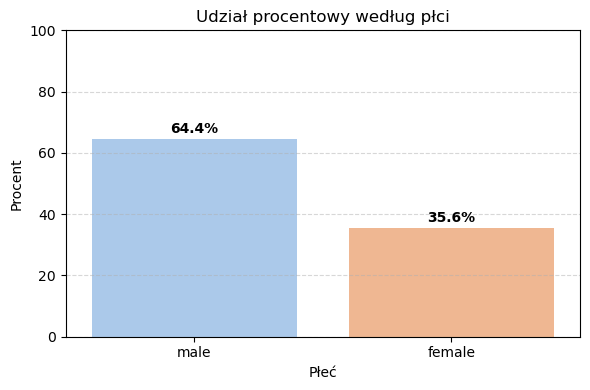

In [57]:
# udział procentowy pasażerów według płci
procent_df = df['sex'].value_counts(normalize=True).reset_index()
procent_df.columns = ['sex', 'percent']
procent_df['percent'] *= 100

plt.figure(figsize=(6, 4))
ax = sns.barplot(x='sex', y='percent', data=procent_df, palette='pastel')

# Opisy osi i tytuł
plt.title('Udział procentowy według płci')
plt.ylabel('Procent')
plt.xlabel('Płeć')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Dodanie etykiet nad słupkami
for i, row in procent_df.iterrows():
    ax.text(i, row['percent'] + 2, f"{row['percent']:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

##### na statku płyneło niemal dwukrotnie więcej mężczyzn niż kobiet

C:\Users\Zoltr\AppData\Local\Temp\ipykernel_15292\1074237090.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='Set2')


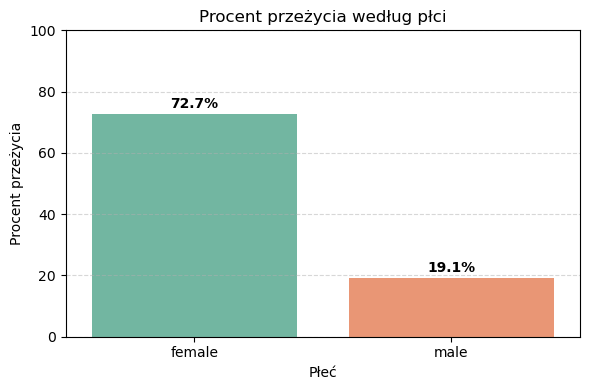

In [58]:
# Grupujemy po płci i obliczamy średnią wartość w kolumnie 'survived'
# (czyli procent przeżycia, bo 1 = przeżył, 0 = nie)
survival_rates = df.groupby('sex')['survived'].mean() * 100

# Rysujemy wykres słupkowy
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='Set2')

# Opisy osi i tytuł
plt.title('Procent przeżycia według płci')
plt.ylabel('Procent przeżycia')
plt.xlabel('Płeć')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Dodajemy etykiety nad słupkami
for i, v in enumerate(survival_rates.values):
    ax.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

##### jak widać ponad 70% wszystkich kobiet oraz zaledwie 20% mężczyzn z całego statku przeżyło 

C:\Users\Zoltr\AppData\Local\Temp\ipykernel_15292\3136731334.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='pclass', y='percent', data=procent_df, palette='pastel')


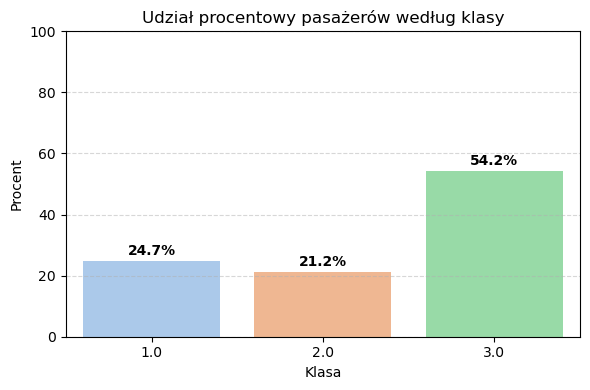

In [59]:
# Obliczamy procent pasażerów w każdej klasie
procent_df = df['pclass'].value_counts(normalize=True).sort_index().reset_index()
procent_df.columns = ['pclass', 'percent']
procent_df['percent'] *= 100

plt.figure(figsize=(6, 4))
ax = sns.barplot(x='pclass', y='percent', data=procent_df, palette='pastel')

# Opisy osi i tytuł
plt.title('Udział procentowy pasażerów według klasy')
plt.ylabel('Procent')
plt.xlabel('Klasa')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Dodajemy etykiety nad słupkami
for i, row in procent_df.iterrows():
    ax.text(i, row['percent'] + 2, f"{row['percent']:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

##### ciekawe jest to że więcej osób było w klasie 1 niż 2 jednak najwiecej biletów zakupiono do klasy 3

C:\Users\Zoltr\AppData\Local\Temp\ipykernel_15292\534244484.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='pclass', y='percent', data=survival_df, palette='Set2')


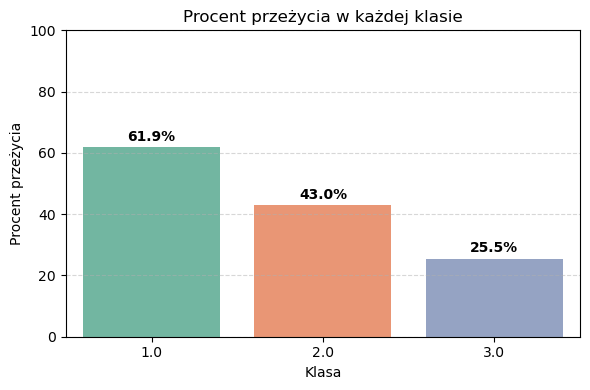

In [60]:
# Obliczamy przeżywalność w każdej klasie
survival_rates = df.groupby('pclass')['survived'].mean().sort_index() * 100
survival_df = survival_rates.reset_index()
survival_df.columns = ['pclass', 'percent']

plt.figure(figsize=(6, 4))
ax = sns.barplot(x='pclass', y='percent', data=survival_df, palette='Set2')

# Opisy osi i tytuł
plt.title('Procent przeżycia w każdej klasie')
plt.ylabel('Procent przeżycia')
plt.xlabel('Klasa')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Dodajemy etykiety nad słupkami
for i, row in survival_df.iterrows():
    ax.text(i, row['percent'] + 2, f"{row['percent']:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

##### jak widać wyższa klasa wiązała się z większą szansą na przeżycie

In [61]:
duplikaty = df['name'].value_counts()
duplikaty = duplikaty[duplikaty > 1].index
df[df['name'].isin(duplikaty)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
725,3.0,1.0,"Connolly, Miss. Kate",female,22.0,0.0,0.0,370373,7.7500,NaN,Q,13,NaN,Ireland
726,3.0,0.0,"Connolly, Miss. Kate",female,30.0,0.0,0.0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
924,3.0,0.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,NaN,70.0,NaN
925,3.0,0.0,"Kelly, Mr. James",male,44.0,0.0,0.0,363592,8.0500,NaN,S,NaN,NaN,NaN


#### Powtarzają się jedynie dwa imiona i nazwiska jednak żadne z nich nie pokrywa się z wiekiem ani numerem biletu zatem możemy założyć wyjątkową zbierzność imion i uznać brak duplikatów w tym DataFramie

In [62]:
# wyszukanie brakującej pojedyńczej danej którą można wypełnić średnią z klasy biletu
df[df['fare'].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S,NaN,261.0,NaN


In [63]:
#uzupełnienie wartości fare dla średniej z danej klasy biletu
df['fare'] = df['fare'].fillna(df.groupby('pclass')['fare'].transform('mean'))
df.iloc[1225]

C:\Users\Zoltr\AppData\Local\Temp\ipykernel_15292\2056596975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fare'] = df['fare'].fillna(df.groupby('pclass')['fare'].transform('mean'))


pclass                      3.0
survived                    0.0
name         Storey, Mr. Thomas
sex                        male
age                        60.5
sibsp                       0.0
parch                       0.0
ticket                     3701
fare                  13.302889
cabin                       NaN
embarked                      S
boat                        NaN
body                      261.0
home.dest                   NaN
Name: 1225, dtype: object

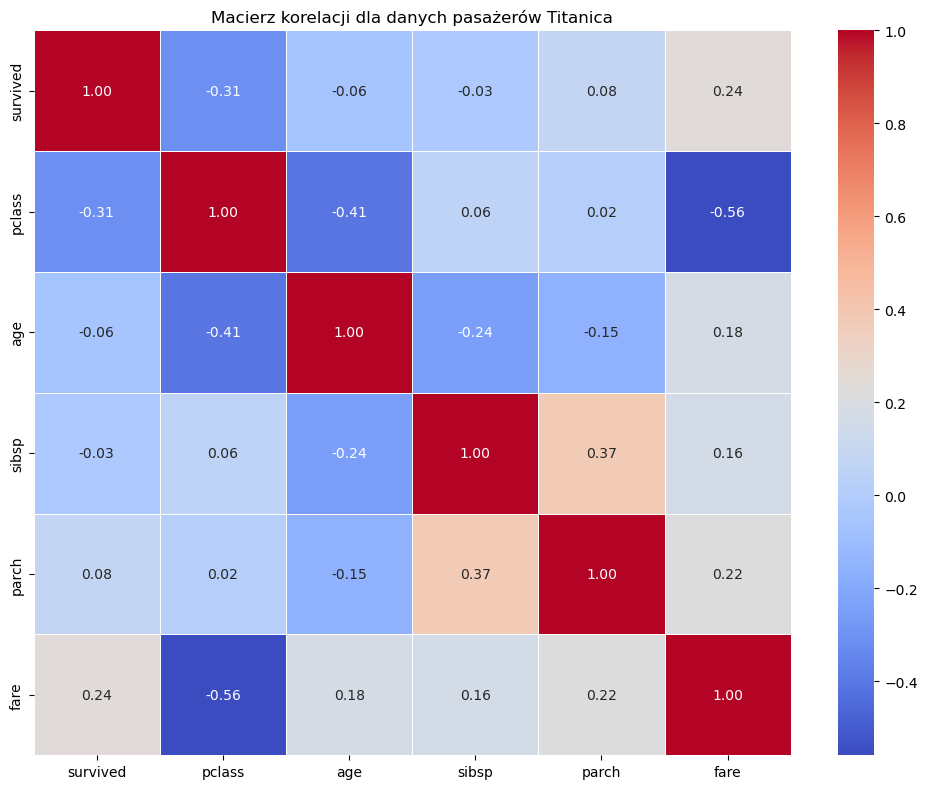

In [64]:
# Korelacje
# Wybieramy tylko kolumny numeryczne
selected_columns= ['survived','pclass', 'age', 'sibsp','parch','fare',]

# Obliczamy korelacje
correlation_matrix = df[selected_columns].corr()

# Wykres heatmapy
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Macierz korelacji dla danych pasażerów Titanica')
plt.tight_layout()
plt.show()


C:\Users\Zoltr\AppData\Local\Temp\ipykernel_15292\4283510307.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='age', data=df[df['age'].notna()], palette='Set3')


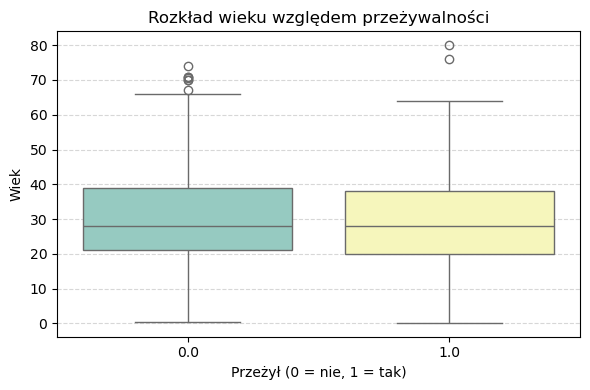

In [65]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='survived', y='age', data=df[df['age'].notna()], palette='Set3')

plt.title('Rozkład wieku względem przeżywalności')
plt.xlabel('Przeżył (0 = nie, 1 = tak)')
plt.ylabel('Wiek')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

C:\Users\Zoltr\AppData\Local\Temp\ipykernel_15292\197150550.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


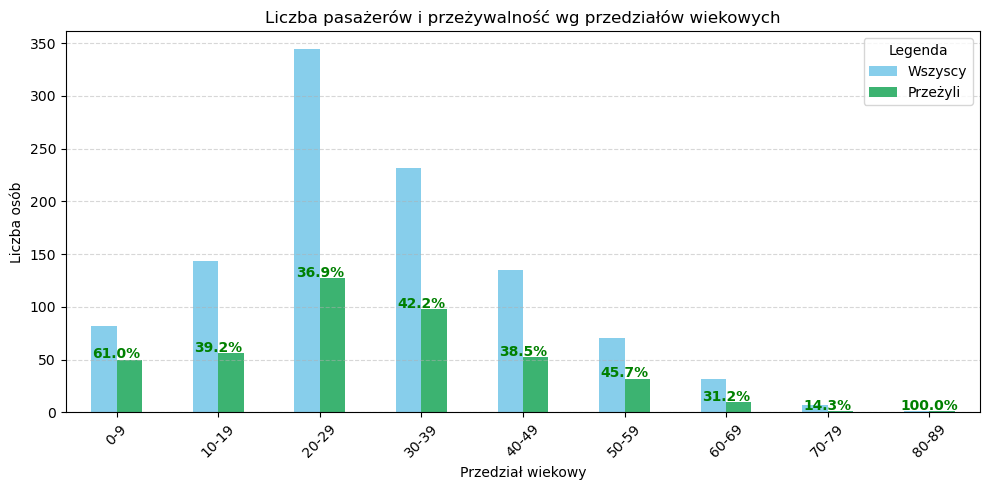

In [66]:
#Liczba pasażerów i przeżywalność wg przedziałów wiekowych
# Tworzymy przedziały wiekowe co 10 lat
bins = range(0, 91, 10)
labels = [f'{b}-{b+9}' for b in bins[:-1]]
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Liczba wszystkich i przeżyłych
total_counts = df['age_bin'].value_counts().sort_index()
survived_counts = df[df['survived'] == 1]['age_bin'].value_counts().sort_index()

# Tworzymy DataFrame z wynikami
counts_df = pd.DataFrame({
    'Wszyscy': total_counts,
    'Przeżyli': survived_counts
}).fillna(0)

# Wykres
ax = counts_df.plot(kind='bar', figsize=(10, 5), color=['skyblue', 'mediumseagreen'])

plt.title('Liczba pasażerów i przeżywalność wg przedziałów wiekowych')
plt.xlabel('Przedział wiekowy')
plt.ylabel('Liczba osób')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='Legenda')
plt.tight_layout()

# Dodajemy etykiety z procentem przeżycia
for i, (total, survived) in enumerate(zip(total_counts, survived_counts)):
    if total > 0:
        percent = (survived / total) * 100
        ax.text(i, survived + 1, f"{percent:.1f}%", ha='center', color='green', fontweight='bold')

plt.show()

### Wnioski
1. Procent kobiet które przyzyły względem wszystkich kobiet jest o wiele wiekszy niz mężczyzn z całego tytanika
2. Można zauwazyc że większą szansę na przeżycie miało się bedąc pasarzemer wyzszej klasy
3. ilość rodziny na pokładzie nie zmieniała szansy na przeżycie
4. wiek ma delikatną ujemną korelację z klasą biletu
5. 61% dzieci do 9  roku życia zostało uratowanych
6. około 73% wszystkich kobiet ocalało
7. jak można zauważyć myśl ratować najpierw kobiety i dzieci podczas katastrof została zachowana
8. grupa wiekowa 20-29 odnotowała największą liczbę ofiar

In [67]:
df.to_excel('new_titanic_data.xlsx',index=False)